<a href="https://colab.research.google.com/github/xiangtgao/JSC270_Assg2/blob/xiang_branch/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries to Import

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [178]:
## added sep to remove the whitespace before each data
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=', ', header=None, engine='python')
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

###Initial data Exploration

In [179]:
print(income94.info())
income94.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1.  The data types match with the descriptions. The numerical data described in the file has int64 as dtype, and the other categorical data has object as dtype.



In [180]:
# check if the missing data is represented with "?" as described in the description file.
print(income94.workclass.value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [181]:
# replace '?' with np.nan for the entire dataset
import numpy as np
income94 = income94.replace("?", np.NaN)

# now check if it works
income94.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [182]:
# check number of missing values in each columns.
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64



2.   The missing values in the dataset was originally represented with '?'. Since there are no misspecified data types, I do not need to cast any types. Also, the missing data is now represented as np.nan; the number of missing values is shown above.



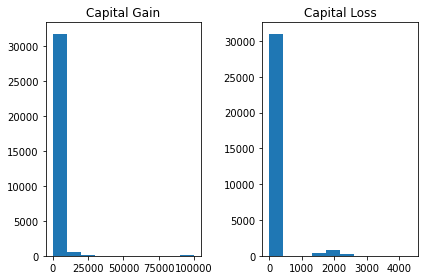

In [183]:
def hist_subplot(data1, data2, title1, title2):
  fig, (plt1, plt2) = plt.subplots(1, 2)
  plt1.hist(data1)
  plt2.hist(data2)
  plt1.set_title(title1)
  plt2.set_title(title2)
  fig.tight_layout()
  fig.show()

# adding plots for distributions of capital gain/loss
hist_subplot(income94.capital_gain, income94.capital_loss, 
             'Capital Gain', 'Capital Loss')

no_change    28330
gain          2712
loss          1519
Name: capital_growth, dtype: int64


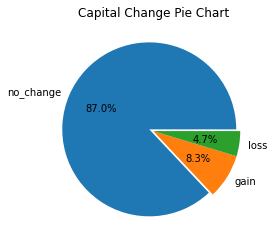

In [184]:
# combine these two into one capital_growth variable that is a catrgorical
# variable to clearly see how the capital changes.

conditions = [(income94.capital_gain == 0)&(income94.capital_loss==0),
        (income94.capital_gain>0), (income94.capital_loss>0)]
values = ["no_change", "gain", "loss"]
income94['capital_growth'] = np.select(conditions, values)
print(income94.capital_growth.value_counts())
pie_x = (income94.capital_growth.value_counts() / income94.capital_growth.count())
plt.pie(pie_x, labels=values, autopct='%1.1f%%', explode=(0.05,0,0))
plt.title("Capital Change Pie Chart")
plt.show()




3.   These variables should be transformed since they are essentially telling one thing: the net change in capital for person, and their distributions are extremely left skewed. I combined these two variables into one categorical variable that consists of three categories: no change, gain, and loss. In this way, I created a pie chart that shows percentage of people in each category.



count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


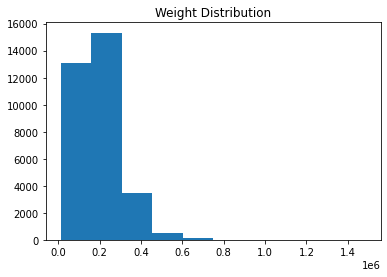

In [185]:
# explore the final weight variable
print(income94.fnlwgt.describe())
plt.hist(income94.fnlwgt)
plt.title("Weight Distribution")
plt.show()

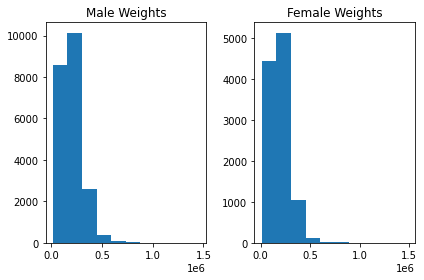

In [186]:
male = income94.query("sex == 'Male'")
female = income94.query("sex == 'Female'")

# compare final weights between men and women
hist_subplot(male.fnlwgt, female.fnlwgt, "Male Weights", "Female Weights")

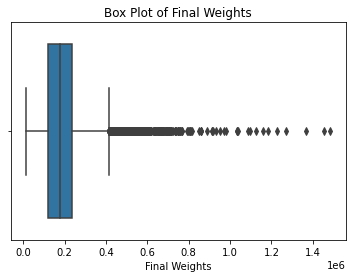

In [187]:
# take a look at the outliers
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('Final Weights')
plt.title('Box Plot of Final Weights')
plt.show()



4.   The distribution of fnlwgt is not symmetrically distributed bur rather left skewed. The distribution for men and women overall looks identical by eyeballing the shape; however, we need to notice that the number of men in the dataset double the number of women if we look at the frequency label on the left. On the other hand, the final weights are distributed similarly, ranging from 0 to below 0.5 mainly. I do not think we need to exclude these outliers. The weighting is meant to reflect how this individual represent the population based on demographics, and there is quite a bit of people that are considered as outliers in the above boxplot. I think this information should be reflected in our analysis rather than discarded since there are people differs from others to some extent.


### Correlation

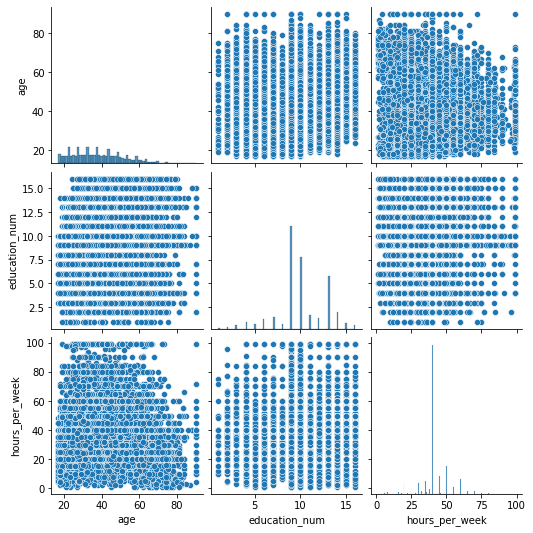

In [188]:
# plot them to see actual trend
sns.pairplot(income94[['age','education_num','hours_per_week']])
plt.show()

In [189]:
# correlation matrix
income94[['age','education_num','hours_per_week']].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


a. From the pair plot, none of them seem to have a linear relationship whatsoever. The matrix shows a 0.148 for cor(education_num, hours_per_week) which can be considered as a weak positive correlation.

In [190]:
# Hypothesis test for correlation between education_num and hours_per_week
t_result = stats.pearsonr(income94.education_num, income94.hours_per_week)
print(t_result)
print("Correlation: %10.9f \np-value: %10.5e" %(t_result[0], t_result[1]))

(0.1481227326229122, 4.2366474790836004e-159)
Correlation: 0.148122733 
p-value: 4.23665e-159


b. education_num and hours_per_week are the only pair with correlation greater than |0.1|. We performed the hypothesis test under the null hypothesis that these two variables are not correlated. The p-value of 4.24e-159 indicates that there is strong evidence to reject the null hypothesis. The correlation of 0.148 suggests a weak positive linear relationship, and this is not surprising as well-educated population will have stable job and more work hours.

In [191]:
# Compare Male and Female for the same task above

t_result_male = stats.pearsonr(male.education_num, male.hours_per_week)
print(t_result_male)
print("For men, \nCorrelation: %10.9f \np-value: %10.5e" %(t_result_male[0], t_result_male[1]))

t_result_female = stats.pearsonr(female.education_num, female.hours_per_week)
print(t_result_female)
print("For women, \nCorrelation: %10.9f \np-value: %10.5e" %(t_result_female[0], t_result_female[1]))

(0.13678240002850428, 1.7342523181609486e-91)
For men, 
Correlation: 0.136782400 
p-value: 1.73425e-91
(0.1787490716478521, 4.96659881860534e-78)
For women, 
Correlation: 0.178749072 
p-value: 4.96660e-78


c. The correlation for women (0.1787) is slightly stronger than men's (0.1368) but not by a large margin; both have a weak positive linear relationship. Moreover, the two p-values (e-91 and e-78) both show strong evidence to reject the null hypothesis and accept that the two variables are correlated. I think this result is expected since gender does not really play a role in the relationship between education and work hours. The correlation is stronger for women because well-educated women are probably more involved in professional development; besides, the sample size of women in this dataset is only half of men which can also be a reason.

In [192]:
# unweighted varience and covarience
np.cov(income94.education_num, income94.hours_per_week)

array([[  6.61888991,   4.70533794],
       [  4.70533794, 152.45899505]])

In [193]:
# weighted varience and covarience
np.cov(income94.education_num, income94.hours_per_week, aweights=income94.fnlwgt)

array([[  6.82892114,   4.63407476],
       [  4.63407476, 146.33651739]])

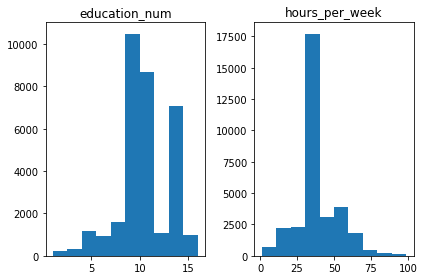

In [194]:
hist_subplot(income94.education_num, income94.hours_per_week, 
             "education_num", "hours_per_week")

d. First, notice the covariance only slightly decreases when going from unweighted 4.705 to 4.634 weighted. The variance of education_num went from 6.62 (unweighted) to 6.83 (weighted). This means that the data points on the “edge” (the ones that can increase dispersion) are weighted more; hence, these samples are underrepresented, and from the histograms, we know that these underrepresented samples are mainly people with less education. The samples from the center and right (one mode) of the distribution are well-represented. The opposite goes with hours_per_work, the unweighted variance 152 decreases to weighted 146. There is less dispersion after weighting which means that samples from center of the distribution are underrepresented. And the people with less hours and people with more hours has small weighting and well represented.

### Regression

In [195]:
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:35:43   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.4104      0.116    314.412      

a)	Yes, men do tend to work more than women in our model. The coefficient for males is 6.0177 (men work 6 hours more), and this result is supported by the p-value given.

In [196]:
reg1 = smf.ols('hours_per_week ~ sex+education_num', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:35:43   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

b)	The trend of men working more hours than women remain the same, but the coefficient does slightly decrease a bit to 5.97. education_num also has a positive coefficient which aligns with our previous result, and it is significant based on the p-value given 0.000.

In [197]:
reg1 = smf.ols('hours_per_week ~ sex+education_num+gross_income_group', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:35:44   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

c)	The trend from previous question is still the same with a little decrease in coefficient. education_num’s coefficient also decreased a bit. The indicator of gross_income_group (income more than 50K) has a positive coefficient of 4.5175, which means people with more income also work more. All these results are significant by the corresponding p-values. We can use the Akaike Information Criterion to assess the models. The last model with 3 parameters has the lowest AIC which should be preferred. Notice AIC considers not just the goodness of the fit but also of overfitting.  We could perform a forward selection during the model fitting procedure: pick the best one-variable model, and then add one more to compare all two-variable model; finally, compare the best two-variable model with the three-variable model.  